In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Motivating SVMs

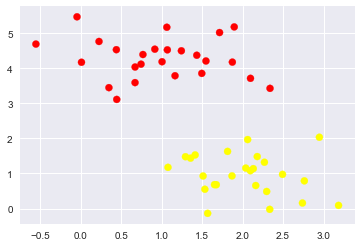

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.6)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

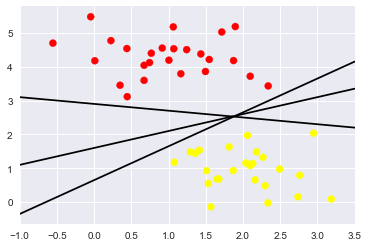

In [3]:
x_fit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(x_fit, m * x_fit + b, '-k')

plt.xlim(-1, 3.5);

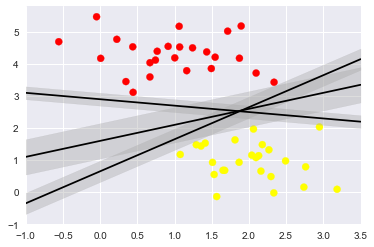

In [4]:
x_fit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    y_fit = m * x_fit + b
    plt.plot(x_fit, y_fit, '-k')
    plt.fill_between(x_fit, y_fit - d, y_fit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1E10)
svc.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    ax = ax or plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    X, Y = np.meshgrid(x, y)
    xy = np.column_stack([X.ravel(), Y.ravel()])
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary nad margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, lw=1, edgecolors='black', color='none')   

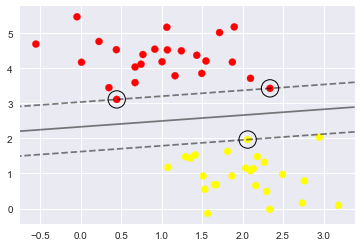

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svc)

In [9]:
svc.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [10]:
svc.predict([[1.5, 2]])

array([1])

In [11]:
svc.predict([[1.5, 2.8]])

array([0])

In [ ]:
def plot_svm(N=10, ax=None):
    

Soft margin classification

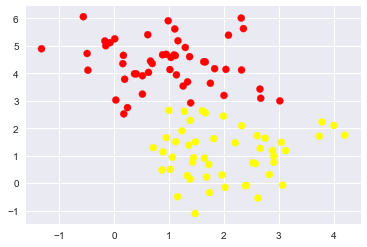

In [13]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

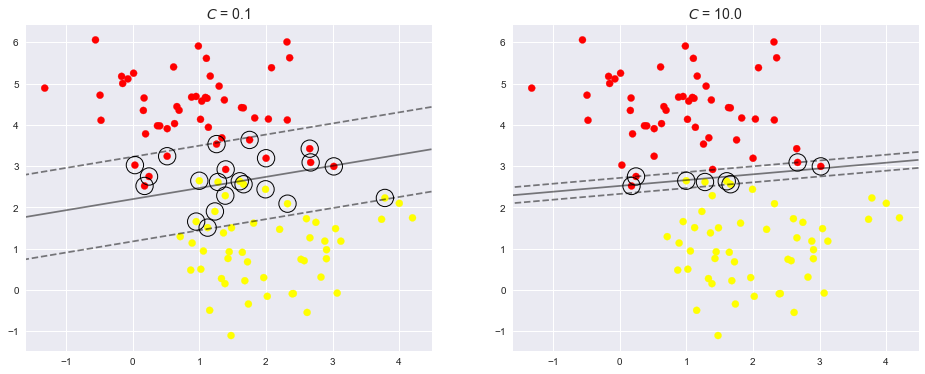

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

for axi, C in zip(ax, [0.1, 10.0]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.set_title(f'$C$ = {C:.1f}', size=14)

Linear SVC with feature scaling

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

svm = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1E10, dual=False))
    ])
svm.fit(X, y);

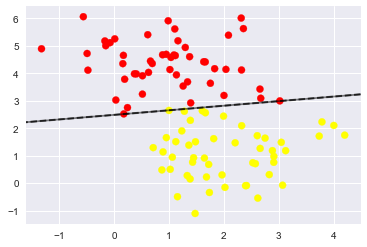

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svm, plot_support=False)

In [26]:
svm.named_steps['linear_svc'].coef_

array([[  27.22671989, -287.5611733 ]])

In [27]:
svm.named_steps['linear_svc'].intercept_

array([4.00983101])